In [1]:
raw_messages = []
with open("wiblur.txt", "r", encoding="utf-8", errors="ignore") as f:
    raw_messages = f.read().splitlines()

raw_messages

['[0:00:09] Fossabot: REFRESH',
 '[0:00:09] Fossabot: REFRESH',
 '[0:00:09] WilburSoot: REFRESH',
 '[0:00:10] Fossabot: REFRESH',
 '[0:00:10] Fossabot: REFRESH',
 '[0:00:10] WilburSoot: REFRESH',
 '[0:00:10] Fossabot: REFRESH',
 '[0:00:10] Fossabot: REFRESH',
 '[0:00:10] WilburSoot: REFRESH',
 '[0:00:10] Fossabot: REFRESH',
 '[0:00:10] WilburSoot: REFRESH',
 '[0:00:10] WilburSoot: REFRESH',
 '[0:00:11] WilburSoot: REFRESH',
 '[0:00:11] WilburSoot: REFRESH',
 '[0:00:11] Annemeeee: LMAOO',
 '[0:00:11] ellieajk: hello again',
 '[0:00:11] dreadfulnfutile: ITS BACK',
 '[0:00:11] Drathinus: HELLO',
 '[0:00:11] WilburSoot: REFRESH',
 '[0:00:11] nqahhh: ...',
 '[0:00:11] itzeilidhh: HELLO',
 '[0:00:11] Eclipsed_Lake: Uhhhmmm',
 '[0:00:11] abiatkinsonxo: Refreshed',
 '[0:00:11] WilburSoot: REFRESH',
 '[0:00:11] weirdCoRey: OMEGALUL',
 '[0:00:11] WilburSoot: REFRESH',
 '[0:00:11] annabananna444: ok back',
 '[0:00:12] sophia_soot: SHIT WHAT HAPPEND',
 '[0:00:12] just__kai_: Hiii',
 '[0:00:12] wol

In [2]:
# remove all characters before the first colon for each message in raw_messages
messages = [message.split(": ", 1)[1] for message in raw_messages]
messages

['REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'LMAOO',
 'hello again',
 'ITS BACK',
 'HELLO',
 'REFRESH',
 '...',
 'HELLO',
 'Uhhhmmm',
 'Refreshed',
 'REFRESH',
 'OMEGALUL',
 'REFRESH',
 'ok back',
 'SHIT WHAT HAPPEND',
 'Hiii',
 'Hahahah',
 'hELLOO',
 '\U0001fae2',
 'HII',
 'wilda?',
 'phew',
 'REFRESH',
 'HAHAHAHA',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 "SaIFisher subscribed with Prime. They've subscribed for 19 months! meow",
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'REFRESH',
 'WHAT GAPPEND',
 'BACK!!',
 'LOLLL',
 'HI',
 'HEY AGAIN WILL',
 'yay',
 'he hath returned',
 "YEAH WE'RE BACK",
 'BACK',
 'Refresh',
 'We back hahahha',
 'oop',
 'hii',
 'that went so well',
 'Back',
 'we back',
 'WE ARE HERE',
 'twitch said no more storytime-',
 'I wanna know what happened with the passport',
 'HEY WILL',
 'hello',
 'lol',
 'OKAY GOOD',
 'NOOOOO',
 'Lmaoooo',
 'H

In [10]:
from wordcloud import WordCloud

# create a wordcloud from the messages list
wordcloud = WordCloud(width=1280, height=720).generate(" ".join(messages))

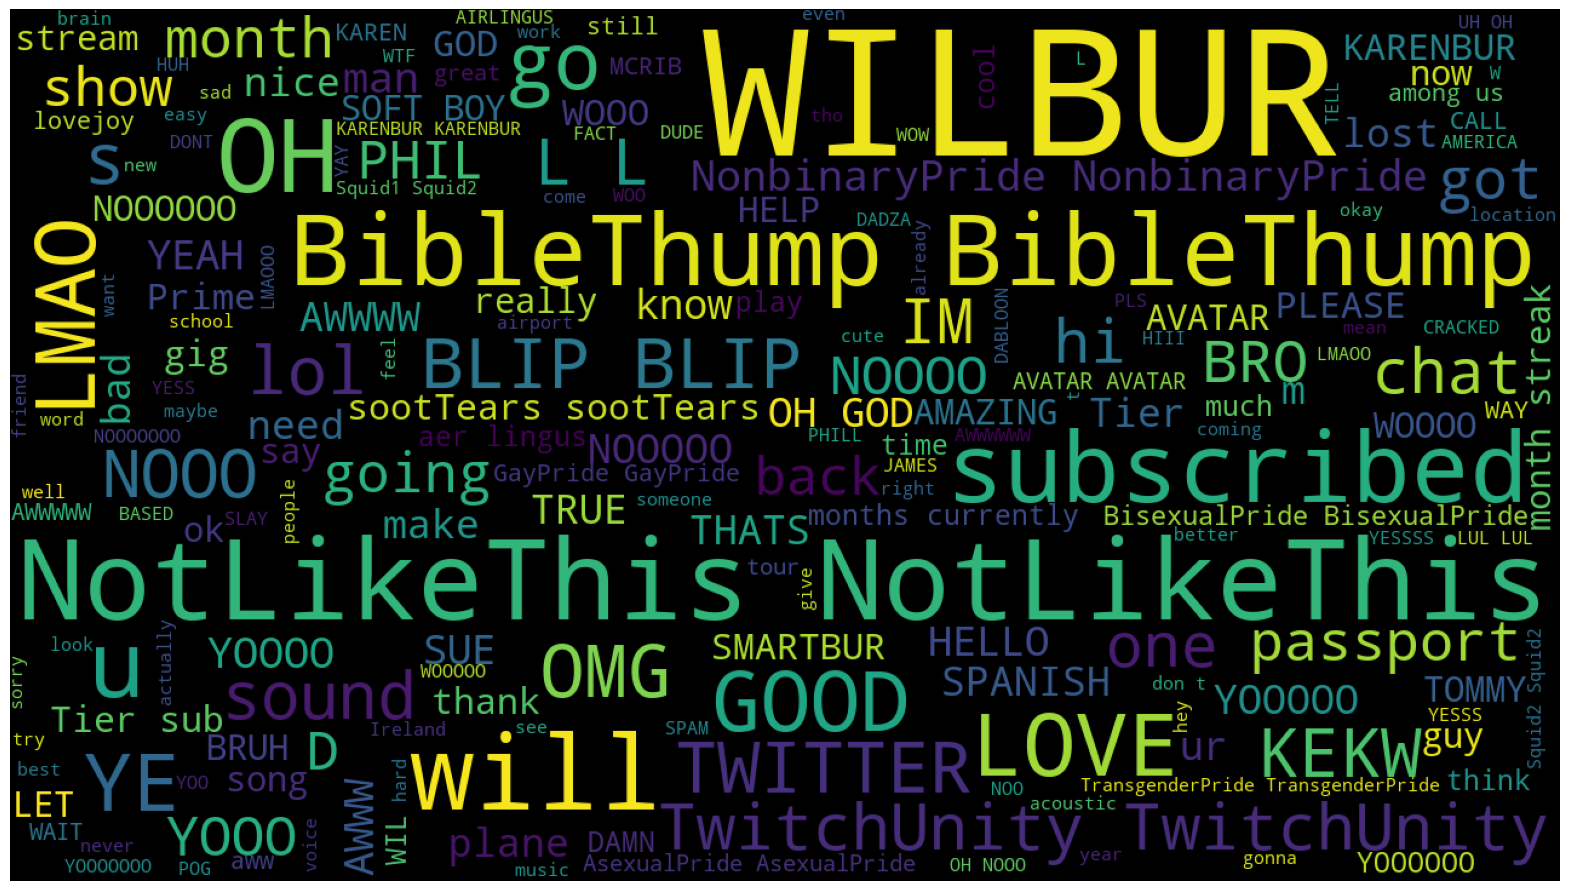

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
# generate bar chart of top 50 word frequencies (case-insensitive)
from collections import Counter
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

# joins all the messages and convert to lower case
sentence = " ".join(messages).lower()

# creates tokens, creates lower class, removes numbers and lemmatizes the words
new_tokens = filter(lambda t: t.isalpha() and t not in stopwords.words(
    "english"), word_tokenize(sentence))

lemmatizer = WordNetLemmatizer()
new_tokens = map(lambda t: lemmatizer.lemmatize(t), new_tokens)

# counts the words, pairs and trigrams
counted = Counter(new_tokens)
counted_2 = Counter(ngrams(new_tokens, 2))
counted_3 = Counter(ngrams(new_tokens, 3))

# creates 3 data frames and returns thems
word_freq = pd.DataFrame(counted.items(), columns=[
                         "word", "frequency"]).sort_values(by="frequency", ascending=False)
word_pairs = pd.DataFrame(counted_2.items(), columns=[
                          "pairs", "frequency"]).sort_values(by="frequency", ascending=False)
trigrams = pd.DataFrame(counted_3.items(), columns=[
                        "trigrams", "frequency"]).sort_values(by="frequency", ascending=False)


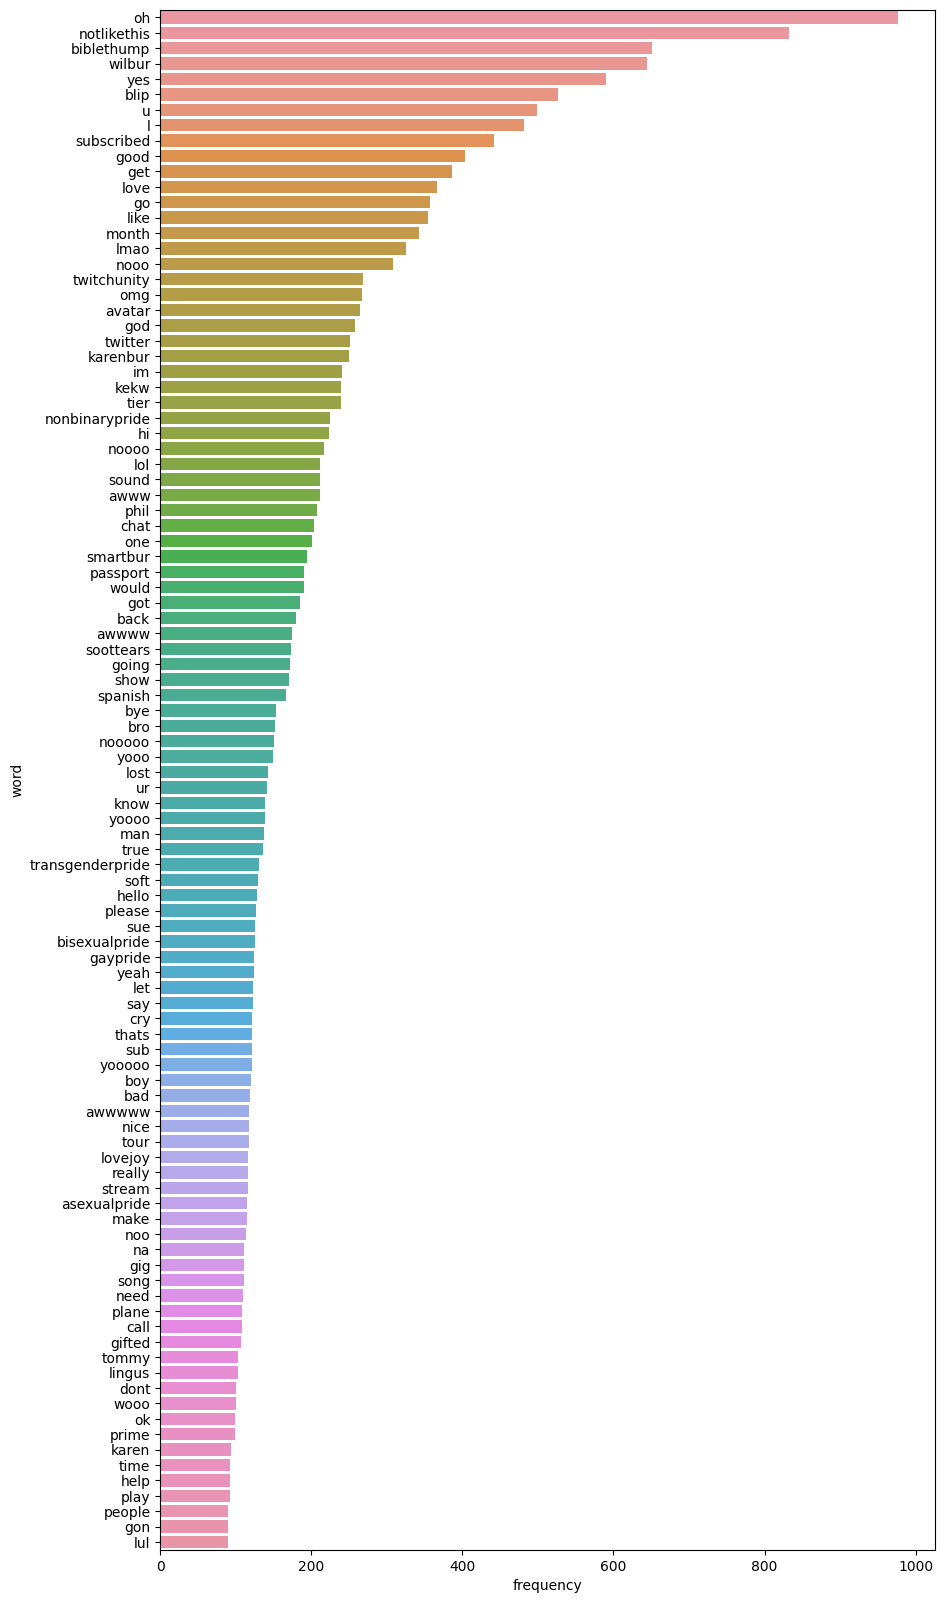

In [23]:
# create subplot of the different data frames
plt.figure(figsize=(10, 20))
sns.barplot(x='frequency',y='word',data=word_freq.head(100))
plt.show()